# understand through implementation: hopfield model in numpy

Shaobo Guan
2018-0515

In [529]:
% matplotlib inline
import importlib
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocess

import utils
import hopfield_net

importlib.reload(utils)
importlib.reload(hopfield_net)

<module 'hopfield_net' from '/shared/homes/sguan/Coding_Projects/DynamicNN/hopfield_net.py'>

## Prepare data

... loading data


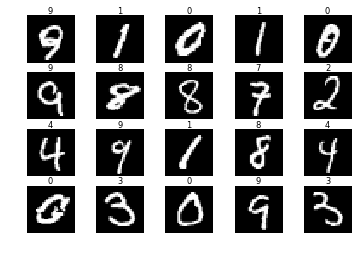

In [530]:
# load nmist data
(X_dtr, y_dtr), (X_dvl, y_dvl), (X_dts, y_dts) = utils.load_data()

# unravel data for doing convolution:
X_dtr = utils.data_unravel(X_dtr)[:, :, :, None]
X_dvl = utils.data_unravel(X_dvl)[:, :, :, None]
X_dts = utils.data_unravel(X_dts)[:, :, :, None]



# one hot encoding of labels
ohe = preprocess.OneHotEncoder(sparse=False)
ohe.fit(y_dtr[:, None])
Y_dtr = ohe.transform(y_dtr[:, None])
Y_dvl = ohe.transform(y_dvl[:, None])
Y_dts = ohe.transform(y_dts[:, None])

# plot example data
importlib.reload(utils)
h_fig, h_ax = plt.subplots(nrows=4, ncols=5)
for ax in h_ax.ravel():
    plt.axes(ax)
    utils.data_plot(X_dtr, y_dtr)
plt.show()
plt.close('all')


In [531]:
X_dtr.shape

(50000, 28, 28, 1)

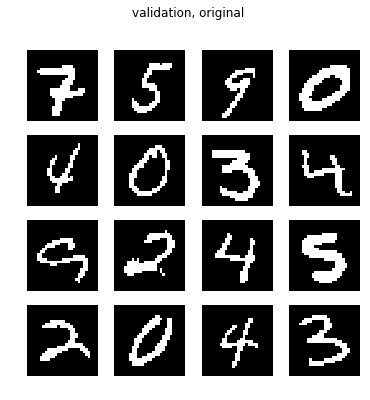

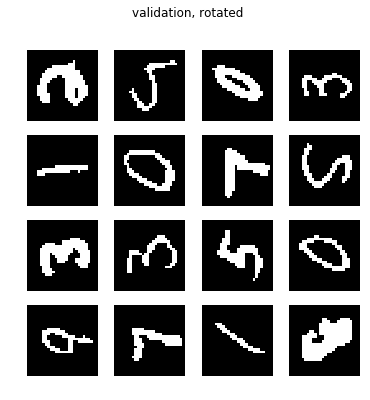

In [532]:
X_dvl_flp = X_dvl[:, :, ::-1]
X_dvl_rot = (np.rot90(X_dvl, k=1, axes=[1,2]))

X_tr = np.reshape(X_dtr, [X_dtr.shape[0], -1])
X_vl = np.reshape(X_dvl, [X_dvl.shape[0], -1])
X_vl_rot = np.reshape(X_dvl_rot, [X_dvl_rot.shape[0], -1])

X_tr = utils.data_binarize(X_tr, threshold=0.5, states='-1,1')
X_vl = utils.data_binarize(X_vl, threshold=0.5, states='-1,1')
X_vl_rot = utils.data_binarize(X_vl_rot, threshold=0.5, states='-1,1')


utils.data_plot(X_vl, n=16)
plt.suptitle('validation, original')
plt.gcf().set_size_inches(6,6)


utils.data_plot(X_vl_rot, n=16)
plt.suptitle('validation, rotated')
plt.gcf().set_size_inches(6,6)


## Hopfield model

In [533]:
importlib.reload(hopfield_net)

<module 'hopfield_net' from '/shared/homes/sguan/Coding_Projects/DynamicNN/hopfield_net.py'>

In [534]:
model = hopfield_net.HopfieldNet(X_tr.shape[1])
model.train_Hebbian(X=X_tr[:10])

In [10]:
E_tr = model.cal_energy(X_tr)
E_vl = model.cal_energy(X_vl)
E_vl_rot = model.cal_energy(X_vl_rot)

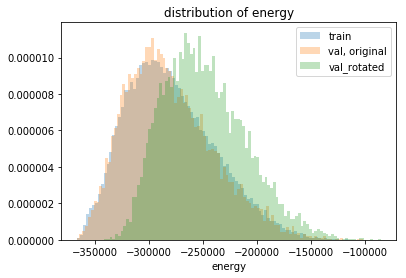

In [11]:
plt.hist(E_tr, bins=100, density=True, alpha=0.3)
plt.hist(E_vl, bins=100, density=True, alpha=0.3)
plt.hist(E_vl_rot, bins=100, density=True, alpha=0.3)
plt.xlabel('energy')
plt.title('distribution of energy')
plt.legend(['train', 'val, original', 'val_rotated'])

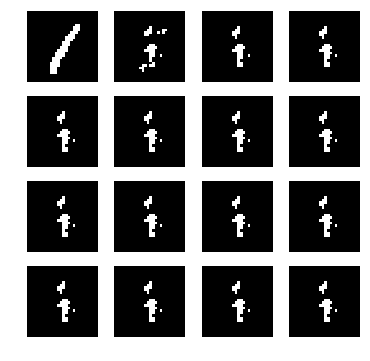

In [13]:
i=3
X = X_tr[i:i+1, :]
# X = np.sign(np.random.randn(*X.shape))
# X = np.sign(X_tr[0:1, :] + X_tr[1:2, :])
#X = X + np.random.randn(*X.shape)
plt.figure(figsize=(6,6))
for iter in range(16):
    plt.subplot(4,4,iter+1)
    utils.data_plot(X)
    X = model.inference(X)

(array([1.40000e+01, 6.02000e+02, 1.74480e+04, 2.30680e+04, 0.00000e+00,
        1.29002e+05, 6.08500e+04, 6.93140e+04, 0.00000e+00, 3.14358e+05]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

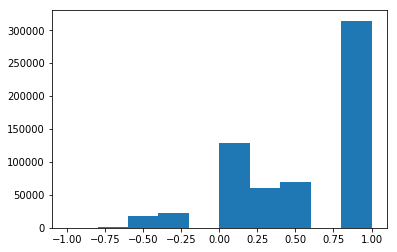

In [15]:
plt.hist(model.W.ravel())

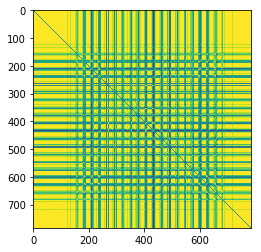

In [11]:
plt.imshow(model.W)

## Boltzmann Net with no Hidden Units (stachastic Hopfield Model)

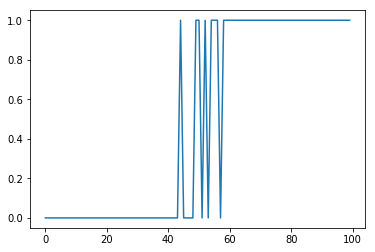

In [778]:
import boltzmann_net_no_hidden
plt.figure(facecolor='w')
plt.plot(boltzmann_net_no_hidden.bernoulli_sample(boltzmann_net_no_hidden.sigmoid_fun(np.linspace(-10.0, 10.0, 100))) )

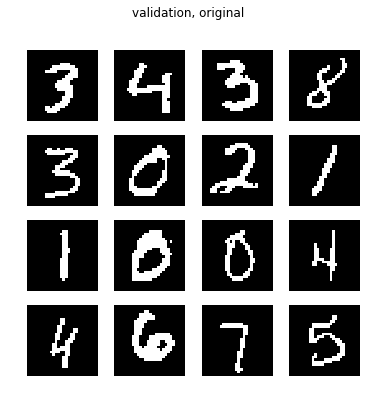

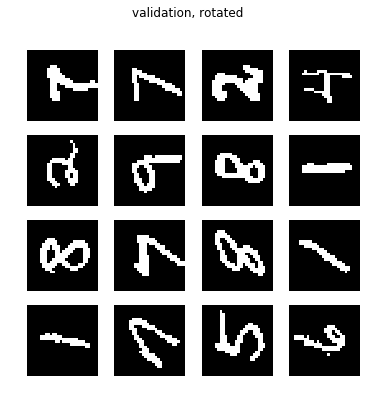

In [779]:
X_dvl_flp = X_dvl[:, :, ::-1]
X_dvl_rot = (np.rot90(X_dvl, k=1, axes=[1,2]))

X_tr = np.reshape(X_dtr, [X_dtr.shape[0], -1])
X_vl = np.reshape(X_dvl, [X_dvl.shape[0], -1])
X_vl_rot = np.reshape(X_dvl_rot, [X_dvl_rot.shape[0], -1])

X_tr = utils.data_binarize(X_tr, threshold=0.5, states='0,1')
X_vl = utils.data_binarize(X_vl, threshold=0.5, states='0,1')
X_vl_rot = utils.data_binarize(X_vl_rot, threshold=0.5, states='0,1')


utils.data_plot(X_vl, n=16)
plt.suptitle('validation, original')
plt.gcf().set_size_inches(6,6)


utils.data_plot(X_vl_rot, n=16)
plt.suptitle('validation, rotated')
plt.gcf().set_size_inches(6,6)

In [887]:
importlib.reload(utils)
importlib.reload(boltzmann_net_no_hidden)

<module 'boltzmann_net_no_hidden' from '/shared/homes/sguan/Coding_Projects/DynamicNN/boltzmann_net_no_hidden.py'>

In [916]:
model = boltzmann_net_no_hidden.BoltzmannNetNoHidden(X_tr.shape[1])
model.train(X=X_tr[:10000], lr=0.1, steps_negstats=2, batchsize=10, yn_verbose=True, batches_per_print=100)

batch 0/1000, time total=0 sec


batch 100/1000, time total=7 sec


batch 200/1000, time total=13 sec


batch 300/1000, time total=19 sec


batch 400/1000, time total=25 sec


batch 500/1000, time total=31 sec


batch 600/1000, time total=38 sec


batch 700/1000, time total=44 sec


batch 800/1000, time total=50 sec


batch 900/1000, time total=56 sec


In [917]:
E_tr = model.cal_energy(X_tr)
E_vl = model.cal_energy(X_vl)
E_vl_rot = model.cal_energy(X_vl_rot)

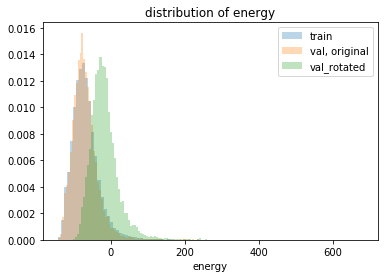

In [919]:
plt.figure(facecolor='w')
plt.hist(E_tr, bins=100, density=True, alpha=0.3)
plt.hist(E_vl, bins=100, density=True, alpha=0.3)
plt.hist(E_vl_rot, bins=100, density=True, alpha=0.3)
plt.xlabel('energy')
plt.title('distribution of energy')
plt.legend(['train', 'val, original', 'val_rotated'])

## randome samples

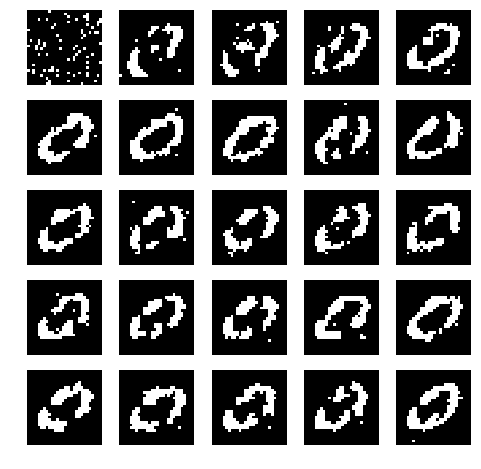

In [993]:
i = 4
X = (np.random.rand(*X.shape)<0.1)*1.0
plt.figure(figsize=(8, 8))
for iter in range(25):
    plt.subplot(5, 5, iter+1)
    utils.data_plot(X)
    for temp in range(10):
        X = model.inference(X)

## pattern completion

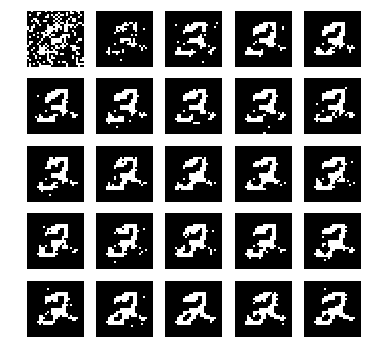

In [1015]:
i = 5
X = X_tr[i:i+1, :]+0 
mask_visible = np.random.rand(1, X.shape[1]) < 0.5
X = X * mask_visible + (np.random.rand(*X.shape)>0.5) * (1-mask_visible)
plt.figure(figsize=(6, 6))
for iter in range(25):
    plt.subplot(5, 5, iter+1)
    utils.data_plot(X)
    for temp in range(1):
        X = model.inference(X, mask_update=1-mask_visible)

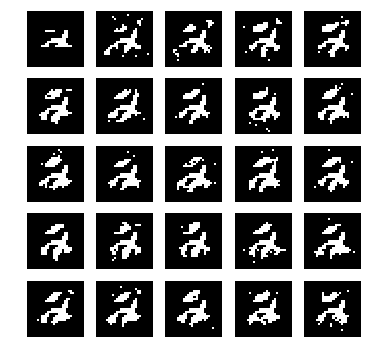

In [973]:
i = 5
X = X_tr[i:i+1, :]+0
mask_visible = np.ones([1, X.shape[1]])
mask_visible[:, :10*28] = 0
mask_visible[:, 18*28:] = 0
X = X * mask_visible 
plt.figure(figsize=(6, 6))
for iter in range(25):
    plt.subplot(5, 5, iter+1)
    utils.data_plot(X)
    for temp in range(2):
        X = model.inference(X, mask_update=1-mask_visible)

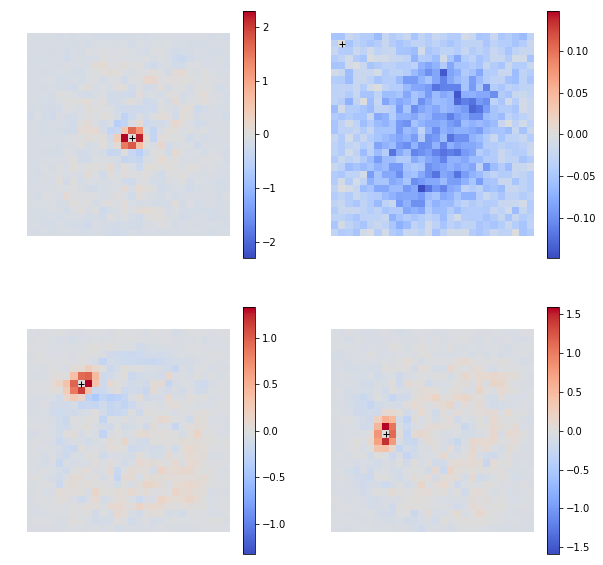

In [1017]:
def plot_W_from_pixel(model, i, j):
    H = int(np.sqrt(model.W.shape[0]))
    W = H
    
    toplot = model.W[i*H+j:i*H+j+1, :]
    utils.data_plot(toplot)
    climabs = np.abs(toplot).max()
    plt.clim(-climabs, climabs)
    plt.set_cmap('coolwarm')
    plt.colorbar()
    plt.plot(j, i, 'k+')

list_pixel_from = [(14, 14), (1, 1), (7, 7), (14, 7)]

h_fig, h_axes = utils.subplots_autorc(len(list_pixel_from), figsize=(10, 10), facecolor='white')
for i_pixel, (i, j) in enumerate(list_pixel_from):
    plt.axes(h_axes[i_pixel])
    plot_W_from_pixel(model, i, j)


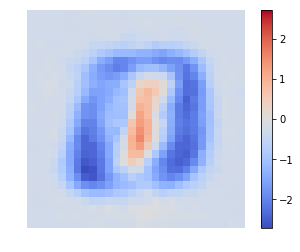

In [1019]:
plt.figure(facecolor='white')
toplot = model.b

utils.data_plot(toplot)
climabs = np.abs(toplot).max()
plt.clim(-climabs, climabs)
plt.set_cmap('coolwarm')
plt.colorbar()
